In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# I. Data Importation

In [311]:
# data importation
df1    = pd.read_csv('/mnt/numberFive/capstone17/phenotypeData/C10004_PHENO1.csv')
df2    = pd.read_csv('/mnt/numberFive/capstone17/phenotypeData/C10004_PHENO2.csv')
df3    = pd.read_csv('/mnt/numberFive/capstone17/phenotypeData/C10004_PHENO3.csv')
df4    = pd.read_csv('/mnt/numberFive/capstone17/phenotypeData/C10004_PHENO4.csv')
df5    = pd.read_csv('/mnt/numberFive/capstone17/phenotypeData/C10004_PHENO5.csv')
df6    = pd.read_csv('/mnt/numberFive/capstone17/phenotypeData/C10004_PHENO6.csv')
df6_V2 = pd.read_csv('/mnt/numberFive/capstone17/phenotypeData/C10004_PHENO6_V2.csv')
df7    = pd.read_csv('/mnt/numberFive/capstone17/phenotypeData/C10004_PHENO7.csv')
df2.shape

/opt/anaconda/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(86449, 2)

# II. Understanding, analysing and visualizing each dataframe  





## II.1. Phenotype 1 : BMI (Body Mass Index)

In [440]:
# data importation
df1    = pd.read_csv('/mnt/numberFive/capstone17/phenotypeData/C10004_PHENO1.csv')
df1.head()

,SUBJID,BMI,BMI_DATE
0,997557158800,23,05AUG1953:00:00:00
1,15152000715,19,17DEC1981:00:00:00
2,133014986026,42,26JAN1970:00:00:00
3,166030749962,23,28DEC1941:00:00:00
4,58652167287,24,19MAR1939:00:00:00


In [441]:
df1.shape

(86064, 3)

- BMI : BMI Measurement ( BMI = Body Mass Index)
- BMI_DATE : date of BMI measurement

In [442]:
# chechking if there are missing values
df1.isnull().any() 

SUBJID      False
BMI         False
BMI_DATE    False
dtype: bool

In [443]:
# checking the types of the features 
df1.dtypes

SUBJID       int64
BMI         object
BMI_DATE    object
dtype: object

In [444]:
# BMI_Date correspond to the date of the BMI measure. This information will not help predict the PsO
df1 = df1.drop(['BMI_DATE'], axis=1)

In [445]:
# Treating the outliers in the BMI coulmn:

df1_BMI_sup_60 = df1.loc[df1['BMI'] == '>=60']  # select the BMI greater than 60 
df1_BMI_inf_18 = df1.loc[df1['BMI'] == '<18']   # select the BMI less than 18
df1            = df1.drop(df1_BMI_sup_60.index)
df1            = df1.drop(df1_BMI_inf_18.index) # drop the BMI greater than 60 and less than 18 from df1
df1.BMI = pd.to_numeric(df1.BMI)                # convert BMI column fro object to numeric to find the max, min, mean,...
df1.BMI.describe()

count    85789.000000
mean        27.710231
std          5.503270
min         18.000000
25%         24.000000
50%         27.000000
75%         30.000000
max         59.000000
Name: BMI, dtype: float64

In [446]:
print( 'There are', df1_BMI_sup_60.shape[0], 'patients with a BMI higher than 60 and', df1_BMI_inf_18.shape[0],
     'patients with a BMI less than 18.') 

There are 51 patients with a BMI higher than 60 and 224 patients with a BMI less than 18.


In [447]:
# finding out the number of patiens with BMI > 60 or with BMI < 18 who have PsA
sup_60_SUBJID = list(df1_BMI_sup_60.SUBJID)
df7_temp_1 = df7.loc[df7['SUBJID'].isin(df1_BMI_sup_60.SUBJID)]

inf_18_SUBJID = list(df1_BMI_inf_18.SUBJID)
df7_temp_2 = df7.loc[df7['SUBJID'].isin(df1_BMI_inf_18.SUBJID)]


print('There is only', df7_temp_1.loc[df7_temp_1['PSOR_ARTH'] != 0].shape[0], 
      'patient with a BMI > 60 who has PsA and also only',
      df7_temp_2.loc[df7_temp_2['PSOR_ARTH'] != 0].shape[0],
      'patient with a BMI < 18 who have PsA')      

There is only 1 patient with a BMI > 60 who has PsA and also only 1 patient with a BMI < 18 who have PsA


In [448]:
# finding out the number of patiens with BMI > 60 or with BMI < 18 who have PsO
sup_60_SUBJID = list(df1_BMI_sup_60.SUBJID)
df7_temp_1 = df7.loc[df7['SUBJID'].isin(df1_BMI_sup_60.SUBJID)]

inf_18_SUBJID = list(df1_BMI_inf_18.SUBJID)
df7_temp_2 = df7.loc[df7['SUBJID'].isin(df1_BMI_inf_18.SUBJID)]


print('There are', df7_temp_1.loc[df7_temp_1['PSORIASIS'] != 0].shape[0], 
      'patients with a BMI > 60 who have PsO and',
      df7_temp_2.loc[df7_temp_2['PSORIASIS'] != 0].shape[0],
      'patients with a BMI < 18 who also have PsO')      

There are 4 patients with a BMI > 60 who have PsO and 8 patients with a BMI < 18 who also have PsO


#### Note: since having a BMI >60 or a BMI < 18 is not normal, those rows are supposed to be outliers. We have checked that they only represent a negligible  amout of the patients having PsO (Psoriasis) or PsA (Psoriatic Arthritis), we assume that deleting those rows, will not affect the predicting power of our Machine Laerning algorithms.

In [449]:
#Save the modified df1 as a csv file
df1.to_csv('Ahmed_Data/new_df1', encoding='utf-8', index=False)

## II.2. Phenotype 2 : Number of membership months 

#### Note: this dataframe is not a real pheotype that will help predit the disease. It is only an additional infornation to perform a sanity check of the data ( patients need have a minimun number of membership months to be eligible to be part of the study)

In [420]:
# data importation
df2    = pd.read_csv('/mnt/numberFive/capstone17/phenotypeData/C10004_PHENO2.csv')
df2.head()
# df2.shape

,SUBJID,MEMBERSHIP_MONTHS
0,19276164281,82
1,73650474474,82
2,70253243832,77
3,725393664088,77
4,832026518377,51


In [814]:
# chechking if there missing values
df2.isnull().any()

SUBJID               False
MEMBERSHIP_MONTHS    False
dtype: bool

- MEMBERSHIP_MONTHS : number of months between date of specimen and end of follow-up (09/30/2015) (NOT VERY CLEAR)

In [60]:
df2.MEMBERSHIP_MONTHS.value_counts();

In [816]:
# checking if patients with membership months less than 12 have PsO/PsA
df2    = pd.read_csv('/mnt/numberFive/capstone17/phenotypeData/C10004_PHENO2.csv')
df2_MEMBERSHIP_MONTHS_sup_100 = df2.loc[df2['MEMBERSHIP_MONTHS'] == '>=100']  # select the BMI greater than 60 
df2                           = df2.drop(df2_MEMBERSHIP_MONTHS_sup_100.index)
df2.MEMBERSHIP_MONTHS         = pd.to_numeric(df2.MEMBERSHIP_MONTHS)
# df2.loc[df2['MEMBERSHIP_MONTHS'] <= 12].SUBJID

In [817]:
df7.loc[df7['SUBJID'].isin(df2.loc[df2['MEMBERSHIP_MONTHS'] <= 12].SUBJID)].PSORIASIS.value_counts()

0    1877
2      71
1      40
Name: PSORIASIS, dtype: int64

In [818]:
df7.loc[df7['SUBJID'].isin(df2.loc[df2['MEMBERSHIP_MONTHS'] <= 12].SUBJID)].PSOR_ARTH.value_counts()

0    1980
2       5
1       3
Name: PSOR_ARTH, dtype: int64

## II.3. Phenotype 3: Gender, Race, Alcohol and Smoking

In [421]:
# data importation:
df3    = pd.read_csv('/mnt/numberFive/capstone17/phenotypeData/C10004_PHENO3.csv')
df3.head()

,SUBJID,ALCOHOL_STATUS,GENDER,REVISED_RPGEHRACE,SMOKING_STATUS
0,247982161041,1.0,2,white,2.0
1,438242670073,1.0,2,white,1.0
2,475454946502,1.0,2,white,1.0
3,824999377278,1.0,2,hispanic,2.0
4,962653160587,0.0,2,hispanic,2.0


- ALCOHOL_STATUS:    0=not a drinker, 1=drinker
- GENDER:            1=male, 2 = female
- REVISED_RPGEHRACE: race
- SMOKING_STATUS:    1=Never, 2=Former, 3=Current 

In [820]:
df3.ALCOHOL_STATUS.value_counts()

1.0    50926
0.0    32548
Name: ALCOHOL_STATUS, dtype: int64

In [821]:
df3.GENDER.value_counts()

2    47546
1    38903
Name: GENDER, dtype: int64

In [822]:
df3.REVISED_RPGEHRACE.value_counts()

white              70049
asian               7072
hispanic            5930
black               2759
other/uncertain      639
Name: REVISED_RPGEHRACE, dtype: int64

In [823]:
df3.SMOKING_STATUS.value_counts()

1.0    47610
2.0    30947
3.0     4183
Name: SMOKING_STATUS, dtype: int64

#### Note : No outliers in df3

## II.4. Phenotype 4: Lab Tests 

In [422]:
# data importation:
df4    = pd.read_csv('/mnt/numberFive/capstone17/phenotypeData/C10004_PHENO4.csv')
df4.head()

/opt/anaconda/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SUBJID,HDL_RESULT,LAB_DATE,LAB_RESULT,LAB_TYPE,LDL_RESULT,TRIGLYC_RESULT
0,677498155877,NaN,24FEB1965:00:00:00,6,RHEUMATOID,NaN,NaN
1,557316916037,NaN,01FEB1975:00:00:00,1,RHEUMATOID,NaN,NaN
2,169475650469,NaN,30MAY1963:00:00:00,32,RHEUMATOID,NaN,NaN
3,392029596797,NaN,29JAN1960:00:00:00,19,RHEUMATOID,NaN,NaN
4,556307180696,NaN,16OCT1962:00:00:00,9,RHEUMATOID,NaN,NaN


In [825]:
df4.shape

(4367933, 7)

#### Note: It is not possible to use dataframe df4 in its intial format: sevral patients 

### II.4.1 Columns "HDL_RESULT" , "LDL_RESULT" & "TRIGLYC_RESULT"

#### II.4.1.1 Finding missing Values in HDL, LDL and Trigycerides in  df4

In [86]:
data = np.array([df4.HDL_RESULT.isnull().value_counts()[0],df4.shape[0] - df4.HDL_RESULT.isnull().value_counts()[0],
                 df4.LDL_RESULT.isnull().value_counts()[0],df4.shape[0]  - df4.LDL_RESULT.isnull().value_counts()[0],
                 df4.TRIGLYC_RESULT.isnull().value_counts()[0],df4.shape[0]  - df4.TRIGLYC_RESULT.isnull().value_counts()[0]]).reshape(3,2)

df4_Missing_Values_Summary = pd.DataFrame(data, columns = ['Missing', 'Non Missing'],
                                                index   = ['HDL_RESULT','LDL_RESULT','TRIGLYC_RESULT'])
df4_Missing_Values_Summary

,Missing,Non Missing
HDL_RESULT,215003,4152930
LDL_RESULT,215003,4152930
TRIGLYC_RESULT,215003,4152930


#### II.4.1.2. keeping only the rows where the HDL, LDL and Trigycerides results are not missing

In [87]:
df4_temp = df4[['SUBJID','HDL_RESULT','LDL_RESULT','TRIGLYC_RESULT']]
df4_temp = df4_temp[pd.notnull(df4_temp['HDL_RESULT'])]

# checking that there are no missing value left
print(df4_temp.HDL_RESULT.isnull().any())
print(df4_temp.LDL_RESULT.isnull().any())
print(df4_temp.TRIGLYC_RESULT.isnull().any())

False
False
False


#### II.4.1.3. Dealing with the string values: since we need to compare the test results to the normal range, all the cells of the dataframe must be numeric

In [88]:
# replacing "<30" by 29 and ">=400" by 401 in TRIGLYC_RESULT column
df4_temp.TRIGLYC_RESULT = df4_temp.TRIGLYC_RESULT.replace('<30',29)
df4_temp.TRIGLYC_RESULT = df4_temp.TRIGLYC_RESULT.replace('>=400',401)
df4_temp.TRIGLYC_RESULT = pd.to_numeric(df4_temp.TRIGLYC_RESULT)

# replacing "<20" by 19 and ">110" by 111 in TRIGLYC_RESULT column
df4_temp.HDL_RESULT = df4_temp.HDL_RESULT.replace('>110',111)
df4_temp.HDL_RESULT = df4_temp.HDL_RESULT.replace('<20',19)
df4_temp.HDL_RESULT = pd.to_numeric(df4_temp.HDL_RESULT)

# replacing "<25" by 24 and ">200" by 201 in TRIGLYC_RESULT column
df4_temp.LDL_RESULT = df4_temp.LDL_RESULT.replace('<25',24)
df4_temp.LDL_RESULT = df4_temp.LDL_RESULT.replace('>200',201)
df4_temp.LDL_RESULT = pd.to_numeric(df4_temp.LDL_RESULT)

#### II.4.1.4. merging the AGE and GENDER with df4_temp

In [89]:
age    = pd.read_csv('/mnt/numberFive/capstone17/analysis/PH_new_features/age_final.csv')
age    = age[['SUBJID', 'Age']]
GENDER = df3[['SUBJID', 'GENDER']]
df4_temp   = pd.merge(df4_temp,age, how='outer', on='SUBJID')
df4_temp   = pd.merge(df4_temp,GENDER, how='outer', on='SUBJID')

In [90]:
df4_temp.head()

,SUBJID,HDL_RESULT,LDL_RESULT,TRIGLYC_RESULT,Age,GENDER
0,372656458730,81.0,126.0,69.0,73.0,2
1,372656458730,74.0,135.0,82.0,73.0,2
2,372656458730,82.0,113.0,85.0,73.0,2
3,340928337320,48.0,147.0,136.0,77.0,1
4,340928337320,58.0,60.0,93.0,77.0,1


#### II.4.1.5. defining the 3 levels "good", "high" & "low" for each test 

- Note : I commented this code because it takes a lot of time to be executed (for loop over 215k rows). We execute only once.

In [92]:
HDL = []
LDL = []
TRIGLYC = []

for i in range(df4_temp.shape[0]):
# filling the HDL new column    
    if df4_temp.Age.values[i] <= 9:
        if df4_temp.TRIGLYC_RESULT.values[i] < 75:
            TRIGLYC = TRIGLYC + ["Low Risk"]
        elif df4_temp.TRIGLYC_RESULT.values[i] > 99:
            TRIGLYC = TRIGLYC + ["High Risk"]
        else:
            TRIGLYC = TRIGLYC + ["Normal Risk"]
    elif df4_temp.Age.values[i] >= 19:
        if df4_temp.TRIGLYC_RESULT.values[i] < 100:
            TRIGLYC = TRIGLYC + ["Optimal"]
        elif df4_temp.TRIGLYC_RESULT.values[i] >= 100 and df4_temp.TRIGLYC_RESULT.values[i] <= 149:
            TRIGLYC = TRIGLYC + ["Low Risk"]
        elif df4_temp.TRIGLYC_RESULT.values[i] >= 150 and df4_temp.TRIGLYC_RESULT.values[i] <= 199:
            TRIGLYC = TRIGLYC + ["Normal Risk"]
        elif df4_temp.TRIGLYC_RESULT.values[i] >= 200 and df4_temp.TRIGLYC_RESULT.values[i] <= 499:
            TRIGLYC = TRIGLYC + ["High Risk"]
        else:
            TRIGLYC = TRIGLYC + ["Very High Risk"]
    else:
        if df4_temp.TRIGLYC_RESULT.values[i] < 90:
            TRIGLYC = TRIGLYC + ["Low Risk"]
        elif df4_temp.TRIGLYC_RESULT.values[i] > 129:
            TRIGLYC = TRIGLYC + ["High Risk"]
        else:
            TRIGLYC = TRIGLYC + ["Normal Risk"]
            
        
        
# filling the HDL new column         
    if df4_temp.Age.values[i] <= 18:
        if df4_temp.HDL_RESULT.values[i] < 110:
            HDL = HDL + ["Low Risk"]
        elif df4_temp.HDL_RESULT.values[i] > 129:
            HDL = HDL + ["High Risk"]
        else:
            HDL = HDL + ["Normal Risk"]
    else:
        if df4_temp.HDL_RESULT.values[i] < 100:
            HDL = HDL + ["Optimal"]
        elif df4_temp.HDL_RESULT.values[i] >= 100 and df4_temp.HDL_RESULT.values[i] <= 129:
            HDL = HDL + ["Low Risk"]
        elif df4_temp.HDL_RESULT.values[i] >= 130 and df4_temp.HDL_RESULT.values[i] <= 159:
            HDL = HDL + ["Normal Risk"]
        elif df4_temp.HDL_RESULT.values[i] >= 160 and df4_temp.HDL_RESULT.values[i] <= 189:
            HDL = HDL + ["High Risk"]
        else:
            HDL = HDL + ["Very High Risk"]

            

# filling the LDL new column  
    if df4_temp.GENDER.values[i] == 1:
        if df4_temp.Age.values[i] <= 18:
            if df4_temp.LDL_RESULT.values[i] < 40:
                LDL = LDL + ["Low"]
            elif df4_temp.LDL_RESULT.values[i] > 45:
                LDL = LDL + ["Optimal"]
            else:
                LDL = LDL + ["Normal"]
        else:
            if df4_temp.LDL_RESULT.values[i] < 40:
                LDL = LDL + ["Low"]
            elif df4_temp.LDL_RESULT.values[i] > 59:
                LDL = LDL + ["Optimal"]
            else:
                LDL = LDL + ["Normal"]
    else:
        if df4_temp.Age.values[i] <= 18:
            if df4_temp.LDL_RESULT.values[i] < 40:
                LDL = LDL + ["Low"]
            elif df4_temp.LDL_RESULT.values[i] > 45:
                LDL = LDL + ["Optimal"]
            else:
                LDL = LDL + ["Normal"]
        else:
            if df4_temp.LDL_RESULT.values[i] < 50:
                LDL = LDL + ["Low"]
            elif df4_temp.LDL_RESULT.values[i] > 59:
                LDL = LDL + ["Optimal"]
            else:
                LDL = LDL + ["Normal"]   

In [94]:
# adding the 3 levels of the new catgorical features for each test defined above
    
df4_temp['HDL'] = HDL
df4_temp['LDL'] = LDL
df4_temp['TRIGLYC'] = TRIGLYC 
df4_temp.head()

#### II.4.1.6. creating the new datafrme new_df4 with the nine new features, to be merged with the main dataframe "data"
- Note : I commented this code because it takes a lot of time to be executed (for loop over 85k rows). We execute only once.

In [ ]:
SUBJID = pd.unique(df4_temp.SUBJID)

HDL_Low = []
HDL_Normal = []
HDL_Optimal = []

LDL_Optimal = []
LDL_Low_Risk = []
LDL_Normal_Risk = []
LDL_High_Risk = []
LDL_Very_High_Risk = []

TRIGLYC_Optimal = []
TRIGLYC_Low_Risk = []
TRIGLYC_Normal_Risk = []
TRIGLYC_High_Risk = []
TRIGLYC_Very_High_Risk = []

for i in SUBJID:
    df = df4_temp.loc[df4_temp['SUBJID'] == i]
    L = df.shape[0]
    HDL_Low = HDL_Low + [df.loc[df['HDL'] == 'Low'].shape[0] /L]
    HDL_Normal = HDL_Normal + [df.loc[df['HDL'] == 'Normal'].shape[0] /L]
    HDL_Optimal = HDL_Optimal + [df.loc[df['HDL'] == 'Optimal'].shape[0] /L]
    
    LDL_Optimal = LDL_Optimal + [df.loc[df['LDL'] == 'Optimal'].shape[0] /L]
    LDL_Low_Risk = LDL_Low_Risk + [df.loc[df['LDL'] == 'Low Risk'].shape[0] /L]
    LDL_Normal_Risk = LDL_Normal_Risk + [df.loc[df['LDL'] == 'Normal Risk'].shape[0] /L]
    LDL_High_Risk = LDL_High_Risk + [df.loc[df['LDL'] == 'High Risk'].shape[0] /L]
    LDL_Very_High_Risk = LDL_Very_High_Risk + [df.loc[df['LDL'] == 'Very High Risk'].shape[0] /L]
    
    TRIGLYC_Optimal = TRIGLYC_Optimal + [df.loc[df['TRIGLYC'] == 'Optimal'].shape[0] /L]
    TRIGLYC_Low_Risk = TRIGLYC_Low_Risk + [df.loc[df['TRIGLYC'] == 'Low Risk'].shape[0] /L]
    TRIGLYC_Normal_Risk = TRIGLYC_Normal_Risk + [df.loc[df['TRIGLYC'] == 'Normal Risk'].shape[0] /L]
    TRIGLYC_High_Risk = TRIGLYC_High_Risk + [df.loc[df['TRIGLYC'] == 'High Risk'].shape[0] /L]
    TRIGLYC_Very_High_Risk = TRIGLYC_Very_High_Risk + [df.loc[df['TRIGLYC'] == 'Very High Risk'].shape[0] /L]

new_df4 = pd.DataFrame ({ 'SUBJID' : SUBJID, 
                        'HDL_Low' : HDL_Low,
                        'HDL_Normal' : HDL_Normal,
                        'HDL_Optimal' : HDL_Optimal,
                         
                        'LDL_Optimal' : LDL_Optimal,
                        'LDL_Low_Risk' : LDL_Low_Risk,
                        'LDL_Normal_Risk' :  LDL_Normal_Risk,
                        'LDL_High_Risk' :  LDL_High_Risk,
                        'LDL_Very_High_Risk' :  LDL_Very_High_Risk,
                         
                        'TRIGLYC_Optimal' :  TRIGLYC_Optimal,
                        'TRIGLYC_Low_Risk' :  TRIGLYC_Low_Risk,
                        'TRIGLYC_Normal_Risk' : TRIGLYC_Normal_Risk,
                        'TRIGLYC_High_Risk' : TRIGLYC_High_Risk,
                        'TRIGLYC_Very_High_Risk' : TRIGLYC_Very_High_Risk } ) 

# reordering the columns of new_df4
col = ['SUBJID', 'HDL_Low', 'HDL_Normal', 'HDL_Optimal', 'LDL_Optimal', 'LDL_Low_Risk', 'LDL_Normal_Risk',
       'LDL_High_Risk', 'LDL_Very_High_Risk', 'TRIGLYC_Optimal','TRIGLYC_Low_Risk', 'TRIGLYC_Normal_Risk',
      'TRIGLYC_High_Risk', 'TRIGLYC_Very_High_Risk']
new_df4 = new_df4[col]
new_df4.head()

In [95]:
new_df4['SUBJID'] = pd.unique(df4_temp.SUBJID)

In [96]:
new_df4.columns.values

array(['HDL_Low', 'HDL_Normal', 'HDL_Optimal', 'LDL_Optimal',
       'LDL_Low_Risk', 'LDL_Normal_Risk', 'LDL_High_Risk',
       'LDL_Very_High_Risk', 'TRIGLYC_Optimal', 'TRIGLYC_Low_Risk',
       'TRIGLYC_Normal_Risk', 'TRIGLYC_High_Risk',
       'TRIGLYC_Very_High_Risk', 'SUBJID'], dtype=object)

#### II.7) Saving the new_df4 dataframe into a csv file

In [97]:
new_df4.to_csv('Ahmed_Data/new_df4_LDL_HDL_Try.csv', encoding='utf-8', index=False)

##### Creating the final modfied phenptype 4 (Lab Tests): other columns have been treated by other members of the research project. I directly use their work

In [211]:
ALC        = pd.read_csv('PH_new_features/new_a1c.csv', index_col= 0)
BUN        = pd.read_csv('PH_new_features/new_bun.csv', index_col= 0)
CCP        = pd.read_csv('PH_new_features/new_ccp.csv', index_col= 0)
CREA       = pd.read_csv('PH_new_features/new_crea.csv', index_col= 0)
CRP        = pd.read_csv('PH_new_features/new_crp.csv', index_col= 0)
ESR        = pd.read_csv('PH_new_features/new_esr_modified.csv', index_col= 0)
GLUC       = pd.read_csv('PH_new_features/new_glucose.csv', index_col= 0)
RHEUMATOID = pd.read_csv('PH_new_features/new_RHEUMATOID.csv', index_col= 0)
v_d        = pd.read_csv('PH_new_features/new_v_D.csv', index_col= 0)
AGE        = pd.read_csv('PH_new_features/age_final.csv', index_col= 0)
LDL_HDL_TRY = pd.read_csv('Ahmed_Data/new_df4_LDL_HDL_Try.csv', index_col= 0 )

#### Here we check that all the treated columns have the same shape: we notice that some of them have less 86064 rows which is the number of the patients in ou data set. This will result in the appearance of NaN's when I will merge all the columns.

In [212]:
print('shape of a1c is ',ALC.shape )
print('shape of bun is ',BUN.shape )
print('shape of ccp is ',CCP.shape )
print('shape of crea is ',CREA.shape )
print('shape of crp is ',CRP.shape )
print('shape of esr is ',ESR.shape )
print('shape of GLUC is ',GLUC.shape )
print('shape of RHEUMATOID is ',RHEUMATOID.shape )
print('shape of v_d is ',v_d.shape )
print('shape of AGE is ',AGE.shape )


shape of a1c is  (55922, 4)
shape of bun is  (69725, 4)
shape of ccp is  (2565, 4)
shape of crea is  (85168, 4)
shape of crp is  (19727, 3)
shape of esr is  (86064, 3)
shape of GLUC is  (83805, 4)
shape of RHEUMATOID is  (17430, 4)
shape of v_d is  (47889, 4)
shape of AGE is  (86064, 2)


#### Here I check that there are not missing values in the new features that have been created

In [213]:
ALC.isnull().any() 

SUBJID       False
a1c_MEAN     False
a1c_UNDER    False
a1c_OVER     False
dtype: bool

In [214]:
ALC.head()

,SUBJID,a1c_MEAN,a1c_UNDER,a1c_OVER
0,6.017795e+11,6.556250,0.0,0.812500
1,7.269826e+11,5.875000,0.0,0.000000
2,4.910247e+11,5.600000,0.0,0.000000
3,1.547974e+11,6.256522,0.0,0.826087
4,6.052887e+11,5.230000,0.0,0.000000


In [215]:
BUN.isnull().any() 

SUBJID       False
MEAN_bun     False
UNDER_bun    False
OVER_bun     False
dtype: bool

In [216]:
BUN.head()

,SUBJID,MEAN_bun,UNDER_bun,OVER_bun
0,6.034450e+11,16.035714,0.0,0.142857
1,3.351483e+11,23.676471,0.0,0.676471
2,5.865521e+11,30.142857,0.0,1.000000
3,1.974538e+11,24.296296,0.0,0.555556
4,5.779308e+11,7.230769,0.5,0.000000


In [217]:
CCP.isnull().any() 

SUBJID       False
ccp_MEAN     False
ccp_UNDER    False
ccp_OVER     False
dtype: bool

In [218]:
CREA.isnull().any() 

SUBJID        False
MEAN_crea     False
UNDER_crea    False
OVER_crea     False
dtype: bool

In [219]:
CRP.isnull().any() 

SUBJID      False
MEAN_CRP     True
OVER_CRP     True
dtype: bool

In [220]:
ESR.isnull().any() 

SUBJID      False
MEAN_ESR     True
OVER_ESR     True
dtype: bool

#### Note: CRP and ESR present missing values because those values miss in the inital datframes before any modificaton. 

In [221]:
GLUC.isnull().any() 

SUBJID        False
MEAN_GLUC     False
UNDER_GLUC    False
OVER_GLUC     False
dtype: bool

In [222]:
RHEUMATOID.isnull().any() 

SUBJID              False
MEAN_RHEUMATOID     False
UNDER_RHEUMATOID    False
OVER_RHEUMATOID     False
dtype: bool

In [223]:
v_d.isnull().any() 

SUBJID       False
v_d_MEAN     False
v_d_UNDER    False
v_d_OVER     False
dtype: bool

In [224]:
AGE.isnull().any() 

SUBJID    False
Age       False
dtype: bool

In [225]:
LDL_HDL_TRY.isnull().any() 

HDL_Normal                False
HDL_Optimal               False
LDL_Optimal               False
LDL_Low_Risk              False
LDL_Normal_Risk           False
LDL_High_Risk             False
LDL_Very_High_Risk        False
TRIGLYC_Optimal           False
TRIGLYC_Low_Risk          False
TRIGLYC_Normal_Risk       False
TRIGLYC_High_Risk         False
TRIGLYC_Very_High_Risk    False
SUBJID                    False
dtype: bool

## II.5. Phenotype 6 : Historical Prescriptions

In [423]:
# data importation:
df6    = pd.read_csv('/mnt/numberFive/capstone17/phenotypeData/C10004_PHENO6.csv')
df6_V2 = pd.read_csv('/mnt/numberFive/capstone17/phenotypeData/C10004_PHENO6_V2.csv')
df6.head()
# df6.columns.values

,SUBJID,ACITRETIN_FILLS,ACITRETIN_RX,ANTIRHEUMATIC_FILLS,ANTIRHEUMATIC_RX,CYCLOSPORINE_FILLS,CYCLOSPORINE_RX,METHOTREXATE_FILLS,METHOTREXATE_RX,USTEKINUMAB_FILLS,USTEKINUMAB_RX
0,391736164572,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,686502736878,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,568603316745,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
3,995491060877,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,218955940208,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


#### Missing Values in df6

In [227]:
data = np.array([df6.ACITRETIN_FILLS.isnull().value_counts()[0],df6.shape[0] - df6.ACITRETIN_FILLS.isnull().value_counts()[0],
                 df6.ACITRETIN_RX.isnull().value_counts()[0],df6.shape[0] - df6.ACITRETIN_RX.isnull().value_counts()[0],
                 df6.ANTIRHEUMATIC_FILLS.isnull().value_counts()[0], df6.shape[0] - df6.ANTIRHEUMATIC_FILLS.isnull().value_counts()[0],
                 df6.ANTIRHEUMATIC_RX.isnull().value_counts()[0],df6.shape[0] - df6.ANTIRHEUMATIC_RX.isnull().value_counts()[0],
                 df6.CYCLOSPORINE_FILLS.isnull().value_counts()[0],df6.shape[0] - df6.CYCLOSPORINE_FILLS.isnull().value_counts()[0],
                 df6.CYCLOSPORINE_RX.isnull().value_counts()[0],df6.shape[0] - df6.CYCLOSPORINE_RX.isnull().value_counts()[0],
                 df6.METHOTREXATE_FILLS.isnull().value_counts()[0],df6.shape[0] - df6.METHOTREXATE_FILLS.isnull().value_counts()[0],
                 df6.METHOTREXATE_RX.isnull().value_counts()[0],df6.shape[0] - df6.METHOTREXATE_RX.isnull().value_counts()[0],
                 df6.USTEKINUMAB_FILLS.isnull().value_counts()[0],df6.shape[0] - df6.USTEKINUMAB_FILLS.isnull().value_counts()[0],
                 df6.USTEKINUMAB_RX.isnull().value_counts()[0],df6.shape[0] - df6.USTEKINUMAB_RX.isnull().value_counts()[0]]).reshape(10,2)

df6_Missing_Values_Summary = pd.DataFrame(data, columns = ['Missing', 'Non Missing'],
                                                index   = ['ACITRETIN_FILLS', 'ACITRETIN_RX', 'ANTIRHEUMATIC_FILLS',
                                                           'ANTIRHEUMATIC_RX', 'CYCLOSPORINE_FILLS', 'CYCLOSPORINE_RX',
                                                           'METHOTREXATE_FILLS', 'METHOTREXATE_RX', 'USTEKINUMAB_FILLS',
                                                           'USTEKINUMAB_RX'])
df6_Missing_Values_Summary

,Missing,Non Missing
ACITRETIN_FILLS,150,86299
ACITRETIN_RX,86449,0
ANTIRHEUMATIC_FILLS,321,86128
ANTIRHEUMATIC_RX,86449,0
CYCLOSPORINE_FILLS,1296,85153
CYCLOSPORINE_RX,86449,0
METHOTREXATE_FILLS,732,85717
METHOTREXATE_RX,86449,0
USTEKINUMAB_FILLS,7,86442
USTEKINUMAB_RX,86449,0


## II.6. Phenotype 6 Version 2 : Historical Prescriptions 

In [228]:
df6_V2.head()

,SUBJID,ADALIMUMAB_RX,LEFLUNOMIDE_FILLS,METHOTREXATE_FILLS,ADALIMUMAB_FILLS,USTEKINUMAB_FILLS,CYCLOSPORINE_FILLS,ETANERCEPT_FILLS,INFLIXIMAB_FILLS,ETANERCEPT_RX,ACITRETIN_RX,CYCLOSPORINE_RX,ANTIRHEUMATIC_RX,ANTIRHEUMATIC_FILLS,LEFLUNOMIDE_RX,USTEKINUMAB_RX,METHOTREXATE_RX,INFLIXIMAB_RX,ACITRETIN_FILLS
0,495972648779,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,0,0,0,NaN
1,125993075227,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,0,0,0,NaN
2,346004522644,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,NaN,0,0,0,0,16.0
3,845132567071,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,0,0,0,NaN
4,830433545512,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,0,0,0,NaN


#### Missing Values in df6_V2

In [229]:
data = np.array([df6_V2.ADALIMUMAB_RX.isnull().value_counts()[0],df6_V2.shape[0] - df6_V2.ADALIMUMAB_RX.isnull().value_counts()[0],
                 df6_V2.LEFLUNOMIDE_FILLS.isnull().value_counts()[0],df6_V2.shape[0] - df6_V2.LEFLUNOMIDE_FILLS.isnull().value_counts()[0],
                 df6_V2.METHOTREXATE_FILLS.isnull().value_counts()[0], df6_V2.shape[0] - df6_V2.METHOTREXATE_FILLS.isnull().value_counts()[0],
                 df6_V2.ADALIMUMAB_FILLS.isnull().value_counts()[0],df6_V2.shape[0] - df6_V2.ADALIMUMAB_FILLS.isnull().value_counts()[0],
                 df6_V2.USTEKINUMAB_FILLS.isnull().value_counts()[0],df6_V2.shape[0] - df6_V2.USTEKINUMAB_FILLS.isnull().value_counts()[0],
                 df6_V2.CYCLOSPORINE_FILLS.isnull().value_counts()[0],df6_V2.shape[0] - df6_V2.CYCLOSPORINE_FILLS.isnull().value_counts()[0],
                 df6_V2.ETANERCEPT_FILLS.isnull().value_counts()[0],df6_V2.shape[0] - df6_V2.ETANERCEPT_FILLS.isnull().value_counts()[0],
                 df6_V2.INFLIXIMAB_FILLS.isnull().value_counts()[0],df6_V2.shape[0] - df6_V2.INFLIXIMAB_FILLS.isnull().value_counts()[0],
                 df6_V2.ETANERCEPT_RX.isnull().value_counts()[0],df6_V2.shape[0] - df6_V2.ETANERCEPT_RX.isnull().value_counts()[0],
                 df6_V2.ACITRETIN_RX.isnull().value_counts()[0],df6_V2.shape[0] - df6_V2.ACITRETIN_RX.isnull().value_counts()[0],
                 df6_V2.CYCLOSPORINE_RX.isnull().value_counts()[0],df6_V2.shape[0] - df6_V2.CYCLOSPORINE_RX.isnull().value_counts()[0],
                 df6_V2.ANTIRHEUMATIC_RX.isnull().value_counts()[0],df6_V2.shape[0] - df6_V2.ANTIRHEUMATIC_RX.isnull().value_counts()[0],
                 df6_V2.ANTIRHEUMATIC_FILLS.isnull().value_counts()[0],df6_V2.shape[0] - df6_V2.ANTIRHEUMATIC_FILLS.isnull().value_counts()[0],
                 df6_V2.LEFLUNOMIDE_RX.isnull().value_counts()[0],df6_V2.shape[0] - df6_V2.LEFLUNOMIDE_RX.isnull().value_counts()[0],
                 df6_V2.USTEKINUMAB_RX.isnull().value_counts()[0],df6_V2.shape[0] - df6_V2.USTEKINUMAB_RX.isnull().value_counts()[0],
                 df6_V2.METHOTREXATE_RX.isnull().value_counts()[0],df6_V2.shape[0] - df6_V2.METHOTREXATE_RX.isnull().value_counts()[0],
                 df6_V2.INFLIXIMAB_RX.isnull().value_counts()[0],df6_V2.shape[0] - df6_V2.INFLIXIMAB_RX.isnull().value_counts()[0],
                 df6_V2.ACITRETIN_FILLS.isnull().value_counts()[0],df6_V2.shape[0] - df6_V2.ACITRETIN_FILLS.isnull().value_counts()[0]]).reshape(18,2)

df6_V2_Missing_Values_Summary = pd.DataFrame(data, columns = ['Missing', 'Non Missing'],
                                                index   = ['ADALIMUMAB_RX', 'LEFLUNOMIDE_FILLS', 'METHOTREXATE_FILLS',
                                                           'ADALIMUMAB_FILLS', 'USTEKINUMAB_FILLS', 'CYCLOSPORINE_FILLS',
                                                           'ETANERCEPT_FILLS', 'INFLIXIMAB_FILLS', 'ETANERCEPT_RX',
                                                           'ACITRETIN_RX','CYCLOSPORINE_RX','ANTIRHEUMATIC_RX',
                                                          'ANTIRHEUMATIC_FILLS','LEFLUNOMIDE_RX','USTEKINUMAB_RX',
                                                           'METHOTREXATE_RX','INFLIXIMAB_RX','ACITRETIN_FILLS'])
df6_V2_Missing_Values_Summary

,Missing,Non Missing
ADALIMUMAB_RX,86449,0
LEFLUNOMIDE_FILLS,106,86343
METHOTREXATE_FILLS,732,85717
ADALIMUMAB_FILLS,136,86313
USTEKINUMAB_FILLS,7,86442
CYCLOSPORINE_FILLS,1296,85153
ETANERCEPT_FILLS,185,86264
INFLIXIMAB_FILLS,13,86436
ETANERCEPT_RX,86449,0
ACITRETIN_RX,86449,0


#### Notes:
- df6 and df6_V2 present the same data, however the second version df6 is more accurate and complete according to the data provider. We will then use only df6_V2.
- As we can see, there are columns which contain only missing values. Those columns will be simply deleted. The other columns present a relatively smaller number of missing values. Since those columns correspnd to the number of presciptions of certain diseases given by doctors to patients, we assume that replacing the NaN's by 0 is an acceptable assumption.

In [230]:
# I delete all the columns that contain only missing values
df6_V2_edited = df6_V2.drop(df6_V2.columns[[1,9,10,11,12,14,15,16,17]], axis=1) 
# I replace all the missing values by 0 
df6_V2_edited.fillna(0, inplace=True)
df6_V2_edited.head()

,SUBJID,LEFLUNOMIDE_FILLS,METHOTREXATE_FILLS,ADALIMUMAB_FILLS,USTEKINUMAB_FILLS,CYCLOSPORINE_FILLS,ETANERCEPT_FILLS,INFLIXIMAB_FILLS,ANTIRHEUMATIC_FILLS,ACITRETIN_FILLS
0,495972648779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,125993075227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,346004522644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
3,845132567071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,830433545512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## II.7. Phenotype 7 : Other diseases

In [469]:
# data importation:
df7    = pd.read_csv('/mnt/numberFive/capstone17/phenotypeData/C10004_PHENO7.csv')
df7.head()

,SUBJID,ALOPECIA,CAD,CROHN,DIABETES,DYSLIPIDEMIA,HYPERTENSION,IBD,METABOLIC,MS,MYO_INFARC,PSORIASIS,PSORIASIS_DATE,PSOR_ARTH,RHEUM_ARTH,SCLERODERMA,SLE,VITILIGO
0,1044489370924,0,0,0,0,1,0,0,0,0,0,0,NaN,0,0,0,0,0
1,150070856802,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0
2,293408760897,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0
3,96605550755,0,2,0,2,2,2,0,1,0,2,0,NaN,0,0,0,0,0
4,662841341827,0,0,0,2,2,2,0,0,0,0,0,NaN,0,0,0,0,0


In [470]:
df7.isnull().any()

SUBJID            False
ALOPECIA          False
CAD               False
CROHN             False
DIABETES          False
DYSLIPIDEMIA      False
HYPERTENSION      False
IBD               False
METABOLIC         False
MS                False
MYO_INFARC        False
PSORIASIS         False
PSORIASIS_DATE     True
PSOR_ARTH         False
RHEUM_ARTH        False
SCLERODERMA       False
SLE               False
VITILIGO          False
dtype: bool

In [471]:
# dropping the column 'PSORIASIS_DATE' because we will not use it in predicting the disease
df7 = df7.drop(['PSORIASIS_DATE'], axis=1)

In [472]:
# df7 preprocessiong: for PsA and PsO, if equal to 1 or 2 than the patient has the disease, otherwise he is healthy
df7.PSORIASIS[df7.PSORIASIS != 0] = 1 
df7.PSOR_ARTH[df7.PSOR_ARTH != 0] = 1 

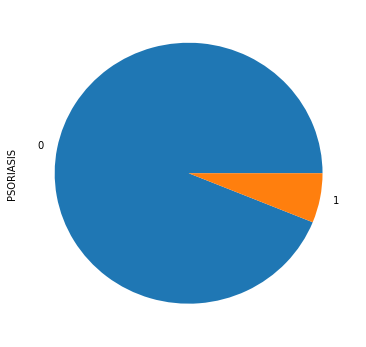

In [473]:
# Rates of patients having or not PsO
PsO_rate = df7.PSORIASIS.value_counts() / len(df7)
PsO_rate.plot.pie(figsize=(6, 6))

In [474]:
# Rates of patients haveing or not PsA
PsA_rate = df7.PSOR_ARTH.value_counts() / len(df7)
PsA_rate

0    0.99513
1    0.00487
Name: PSOR_ARTH, dtype: float64

In [475]:
# comparing the means of the other diseases between the PsO positive pouluation (ill) and PsO negative population (healthy)
PsO_summary = df7.groupby('PSORIASIS')
PsO_summary_mean = PsO_summary.mean()
PsO_summary_mean

,SUBJID,ALOPECIA,CAD,CROHN,DIABETES,DYSLIPIDEMIA,HYPERTENSION,IBD,METABOLIC,MS,MYO_INFARC,PSOR_ARTH,RHEUM_ARTH,SCLERODERMA,SLE,VITILIGO
PSORIASIS,,,,,,,,,,,,,,,,
0,5.501539e+11,0.000000,0.254723,0.000025,0.348836,1.173143,1.092930,0.000111,0.011239,0.0,0.154128,0.000813,0.000419,0.000037,0.000025,0.000012
1,5.462599e+11,0.023199,0.323651,0.014523,0.468502,1.332893,1.311958,0.186911,0.018484,0.0,0.196341,0.066956,0.065447,0.049227,0.008676,0.020747


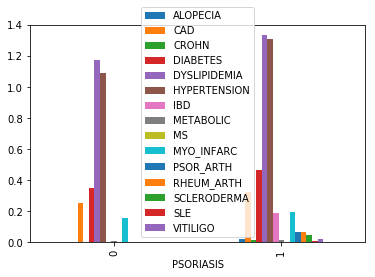

In [476]:
# a bar plot visulazation of the tabe above
PsO_summary_mean.drop('SUBJID', axis=1).plot.bar();

- Data frames df2, df3, df6, df6_V2 & df7 do not need a preprocessing related to the subject ID (column "SUBJID") : all of them cointain 86449 rows correspending to the 86449 diffrent patients we are dealing with. 
- Data frame df1 lacks few rows (385 rows are lacking, we'll try to understand why) but there are no subject ID duplicates ( which makes the task easier)
- Data frames df4 and df5 should be understood and preprocessed. 

In [477]:
#Save the modified df7 as a csv file
df7.to_csv('Ahmed_Data/new_df7')

## III. Merging all the data

In [478]:
# reading the modified dataframes saved as csv files:
df1 = pd.read_csv('Ahmed_Data/new_df1')
df7 = pd.read_csv('Ahmed_Data/new_df7', index_col =0)

In [479]:
df7.head()

,SUBJID,ALOPECIA,CAD,CROHN,DIABETES,DYSLIPIDEMIA,HYPERTENSION,IBD,METABOLIC,MS,MYO_INFARC,PSORIASIS,PSOR_ARTH,RHEUM_ARTH,SCLERODERMA,SLE,VITILIGO
0,1044489370924,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,150070856802,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,293408760897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,96605550755,0,2,0,2,2,2,0,1,0,2,0,0,0,0,0,0
4,662841341827,0,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0


In [480]:
All_Data = pd.merge(df1, df3, on='SUBJID', how = 'outer') 
All_Data = pd.merge(All_Data, ALC, on='SUBJID', how = 'outer') 
All_Data = pd.merge(All_Data, BUN, on='SUBJID', how = 'outer') 
All_Data = pd.merge(All_Data, CCP, on='SUBJID', how = 'outer') 
All_Data = pd.merge(All_Data, CREA, on='SUBJID', how = 'outer') 
All_Data = pd.merge(All_Data, CRP, on='SUBJID', how = 'outer') 
All_Data = pd.merge(All_Data, ESR, on='SUBJID', how = 'outer') 
All_Data = pd.merge(All_Data, GLUC, on='SUBJID', how = 'outer') 
All_Data = pd.merge(All_Data, RHEUMATOID, on='SUBJID', how = 'outer') 
All_Data = pd.merge(All_Data, v_d, on='SUBJID', how = 'outer') 
All_Data = pd.merge(All_Data, AGE, on='SUBJID', how = 'outer') 
All_Data = pd.merge(All_Data, LDL_HDL_TRY, on='SUBJID', how = 'outer') 
All_Data = pd.merge(All_Data, df6_V2, on='SUBJID', how = 'outer') 
All_Data = pd.merge(All_Data, df7, on='SUBJID', how = 'outer') 
All_Data.head()

,SUBJID,BMI,ALCOHOL_STATUS,GENDER,REVISED_RPGEHRACE,SMOKING_STATUS,a1c_MEAN,a1c_UNDER,a1c_OVER,MEAN_bun,...,IBD,METABOLIC,MS,MYO_INFARC,PSORIASIS,PSOR_ARTH,RHEUM_ARTH,SCLERODERMA,SLE,VITILIGO
0,997557158800,23.0,1.0,2,asian,1.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,15152000715,19.0,0.0,2,asian,1.0,5.961538,0.0,0.307692,17.00,...,0,0,0,0,0,0,0,0,0,0
2,133014986026,42.0,1.0,2,white,2.0,5.625000,0.0,0.000000,23.25,...,0,0,0,0,0,0,0,0,0,0
3,166030749962,23.0,1.0,2,asian,2.0,NaN,NaN,NaN,12.00,...,0,0,0,0,0,0,0,0,0,0
4,58652167287,24.0,1.0,1,white,1.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [481]:
All_Data.shape

(86449, 78)

In [482]:
All_Data.columns.values

array(['SUBJID', 'BMI', 'ALCOHOL_STATUS', 'GENDER', 'REVISED_RPGEHRACE',
       'SMOKING_STATUS', 'a1c_MEAN', 'a1c_UNDER', 'a1c_OVER', 'MEAN_bun',
       'UNDER_bun', 'OVER_bun', 'ccp_MEAN', 'ccp_UNDER', 'ccp_OVER',
       'MEAN_crea', 'UNDER_crea', 'OVER_crea', 'MEAN_CRP', 'OVER_CRP',
       'MEAN_ESR', 'OVER_ESR', 'MEAN_GLUC', 'UNDER_GLUC', 'OVER_GLUC',
       'MEAN_RHEUMATOID', 'UNDER_RHEUMATOID', 'OVER_RHEUMATOID',
       'v_d_MEAN', 'v_d_UNDER', 'v_d_OVER', 'Age', 'HDL_Normal',
       'HDL_Optimal', 'LDL_Optimal', 'LDL_Low_Risk', 'LDL_Normal_Risk',
       'LDL_High_Risk', 'LDL_Very_High_Risk', 'TRIGLYC_Optimal',
       'TRIGLYC_Low_Risk', 'TRIGLYC_Normal_Risk', 'TRIGLYC_High_Risk',
       'TRIGLYC_Very_High_Risk', 'ADALIMUMAB_RX', 'LEFLUNOMIDE_FILLS',
       'METHOTREXATE_FILLS', 'ADALIMUMAB_FILLS', 'USTEKINUMAB_FILLS',
       'CYCLOSPORINE_FILLS', 'ETANERCEPT_FILLS', 'INFLIXIMAB_FILLS',
       'ETANERCEPT_RX', 'ACITRETIN_RX', 'CYCLOSPORINE_RX',
       'ANTIRHEUMATIC_RX', 'ANTIRHE

In [483]:
# save the merged data into a csv file
All_Data.to_csv('Ahmed_Data/All_Data.csv', encoding='utf-8', index=False)

## IV. Splitting the data into training, validation and test sets

#### Note: we decided the follwing split: training 70%, vaidation 15% and test 15%. Here only the (training + validation) vs (test) split that is done

In [484]:
train, test = sklearn.model_selection.train_test_split(All_Data, train_size = 0.85, test_size = 0.15, random_state = 1)
train.to_csv('Ahmed_Data/train.csv', encoding='utf-8', index=False)
test.to_csv('Ahmed_Data/test.csv', encoding='utf-8', index=False)